## IterativeImputer
### This notebook outlines the usage of Iterative Imputer (Multivariate Imputation).
### Iterative Imputer substitutes missing values as a function of other features
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("data/heart_disease.csv")
df

### How many Categorical variables in the dataset?

In [ ]:
df.info()

### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [ ]:
for i in range(len(df.columns)):
    missing_data = df[df.columns[i]].isna().sum()
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

### Bonus: Visual representation of missing values

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import IterativeImputer

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### Create IterativeImputer object with max_iterations and random_state=0

In [11]:
imputer = IterativeImputer(max_iter=10, random_state=0)

### Optional - converting df into numpy array

In [12]:
data = df.values

In [13]:
X = data[:, :-1]
y = data[:, -1]

### Fit the imputer model on dataset to perform iterative multivariate imputation

In [ ]:
imputer.fit(X)

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values using transform( ) 

In [15]:
X_transform = imputer.transform(X)

### Sanity Check: Whether missing values are filled or not

In [ ]:
print(f"Missing cells: {sum(np.isnan(X).flatten())}")

In [ ]:
print(f"Missing cells: {sum(np.isnan(X_transform).flatten())}")

### Let's try to visualize the missing values.

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(X_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

### What's the issue here?
#### Hint: Heatmap needs a DataFrame and not a Numpy Array

In [ ]:
df_transform = pd.DataFrame(data=X_transform)
df_transform

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

# Check if these datasets contain missing data
### Load the datasets

In [22]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_test = pd.read_csv("Y_test.csv")
X_test = pd.read_csv("X_test.csv")

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

<Axes: >

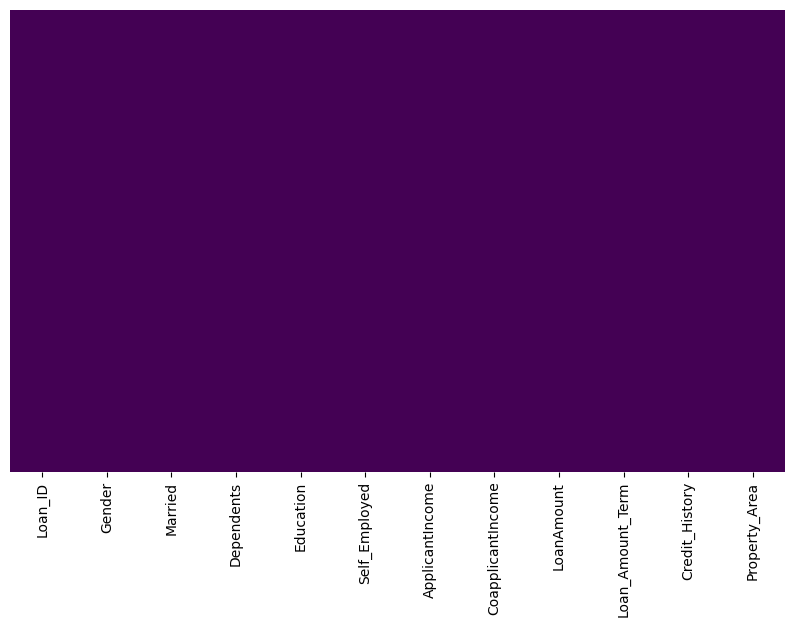

In [156]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Is there missing data in this dataset???

In [ ]:
# Check for missing values in X_train
missing_counts = X_train.isna().sum()
total_missing = missing_counts.sum()

print(f"Total missing values: {total_missing}")
print("\nMissing values by column:")
for col, count in missing_counts.items():
    if count > 0:
        print(f"{col}: {count} missing values")
        
if total_missing == 0:
    print("\nNo missing values found in the training dataset!")

# Build a Logistic Regression model Without imputation

In [25]:
df=pd.read_csv("data/heart_disease.csv")
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
model = LogisticRegression()

In [ ]:
model.fit(X,y)

# Drop all rows with missing entries - Build a Logistic Regression model and benchmark the accuracy

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [ ]:
df=pd.read_csv("data/heart_disease.csv")
df

In [ ]:
df.shape

### Drop rows with missing values

In [ ]:
df = df.dropna()
df.shape

### Split dataset into X and y

In [ ]:
X = df[df.columns[:-1]]
X.shape

In [ ]:
y = df[df.columns[-1]]
y.shape

### Create a pipeline with model parameter

In [35]:
pipeline = Pipeline([('model', model)])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [36]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [37]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
scores

### Print the Mean Accuracy and Standard Deviation from scores

In [ ]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

# Build a Logistic Regression model with IterativeImputer

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [ ]:
df=pd.read_csv("data/heart_disease.csv")
df

### Split dataset into X and y

In [ ]:
df.shape

In [ ]:
X = df[df.columns[:-1]]
X.shape

In [ ]:
y = df[df.columns[-1]]
y

### Create a SimpleImputer with mean strategy

In [45]:
imputer = IterativeImputer(max_iter=10, random_state=0)

### Create a Logistic Regression model

In [46]:
model = LogisticRegression()

### Create a pipeline with impute and model parameters

In [47]:
pipeline = Pipeline([('impute', imputer), ('model', model)])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [48]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [49]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
scores

### Print the Mean Accuracy and Standard Deviation

In [ ]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

### Which accuracy is better? 
- Dropping missing values
- SimpleImputer with Mean Strategy

# IterativeImputer with RandomForest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [55]:
imputer = IterativeImputer(max_iter=10, random_state=0)

In [56]:
model = RandomForestClassifier()

In [57]:
pipeline = Pipeline([('impute', imputer), ('model', model)])

In [58]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [59]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

# Run experiments with different Imputation methods and different algorithms

## Imputation Methods
- Mean
- Median
- Most_frequent
- Constant
- IterativeImputer

## ALGORITHMS
- Logistic Regression
- KNN
- Random Forest
- SVM
- Any other algorithm of your choice

In [ ]:
results =[]

strategies = ['mean', 'median', 'most_frequent','constant']

for s in strategies:
    pipeline = Pipeline([('impute', SimpleImputer(strategy=s)),('model', model)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    results.append(scores)
    
for method, accuracy in zip(strategies, results):
    print(f"Strategy: {method} >> Accuracy: {round(np.mean(accuracy), 3)}   |   Max accuracy: {round(np.max(accuracy), 3)}")
          
          

# Q1: Which is the best strategy for this dataset using Random Forest algorithm?
- SimpleImputer(Mean)
- SimpleImputer(Median)
- SimpleImputer(Most_frequent)
- SimpleImputer(Constant)
- IterativeImputer

# Q2:  Which is the best algorithm for this dataset using IterativeImputer?
- Logistic Regression
- Random Forest
- KNN
- any other algorithm of your choice (BONUS)

# Q3: Which is the best combination of algorithm and best Imputation Strategy overall?
- Mean , Median, Most_frequent, Constant, IterativeImputer
- Logistic Regression, Random Forest, KNN